# Causal discovery with Census data

## Import libraries

In [20]:
import pickle
import pandas as pd
import cdt

import networkx as nx
import matplotlib.pyplot as plt

## Load data

In [22]:
try:
    print(f"Pandas version: {pd.__version__}")
    with open("data/df_causal_discovery.p", "rb") as f:
        df = pickle.load(f)
except:
    print(f"[INFO] The above code doesn't work for pandas >=2.0, downgrading it too 1.5...")
    !conda install pandas=1.5
    print(f"Pandas version: {pd.__version__}")
    with open("data/df_causal_discovery.p", "rb") as f:
        df = pickle.load(f)
    

## Create skeleton graph using graph Lasso

For a lot of these causal discovery algorithms, it helps to start off with a graph skeleton. We can do it with `cdt.independence.graph.Glasso()`.

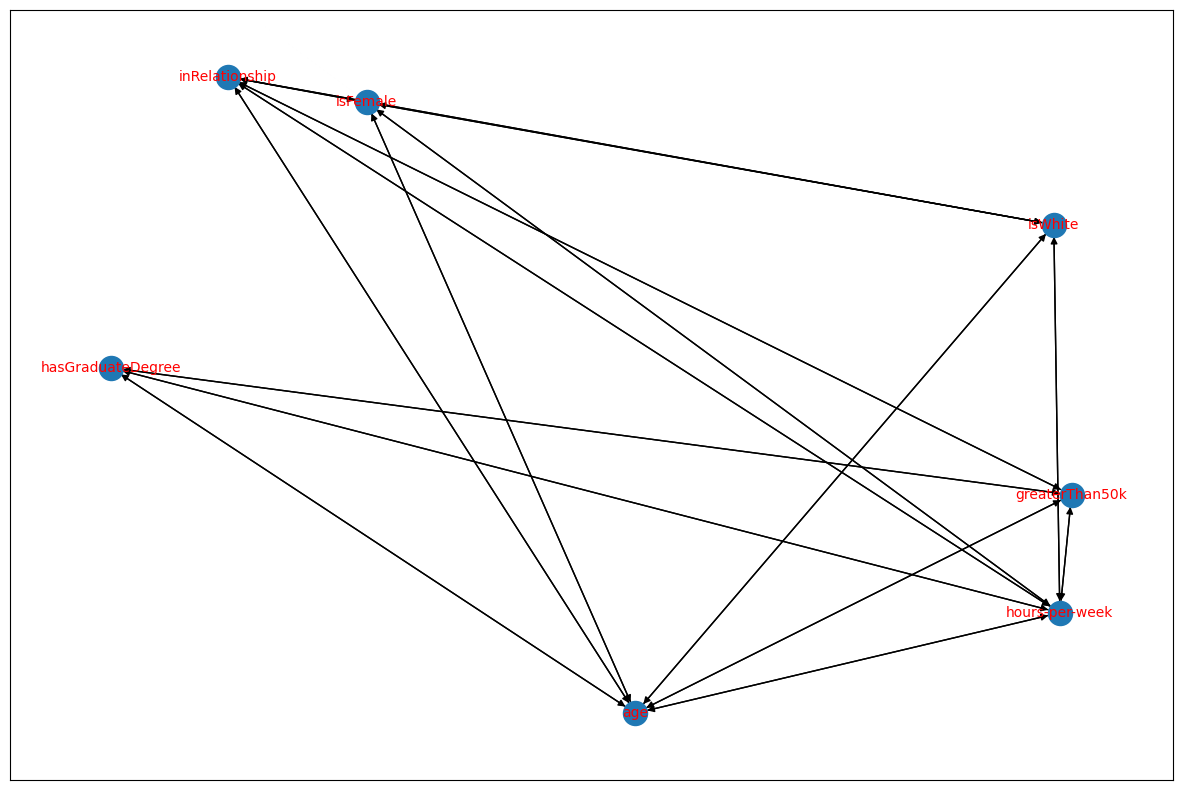

In [23]:
# Initialise graph lasso
glasso = cdt.independence.graph.Glasso()

# Apply graph lasso to the dataset
skeleton = glasso.predict(df)

# Remove self-loops
skeleton.remove_edges_from(nx.selfloop_edges(skeleton))

# Plot the network
fig = plt.figure(figsize=(15, 10))
nx.draw_networkx(skeleton, font_size=10, font_color='r')

## Use Causal discovery algorithms to get a causal model

In [24]:
# Serialise the pandas DataFrame
# df.to_csv("df_causal_discovery.csv", index=False)

### 1. PC Algorithm

In [25]:
import subprocess
print(subprocess.check_output(["which", "Rscript"]).decode().strip())

/Users/edison/Git/causality-learning/venv/bin/Rscript


In [26]:
# cdt.SETTINGS.rpath = "/Users/edison/Git/causality-learning/venv/bin/Rscript"
# cdt.SETTINGS.rpath

In [27]:
# import cdt
# import subprocess

# # point CDT at your venv’s Rscript
# cdt.SETTINGS.rpath = "/Users/edison/Git/causality-learning/venv/bin/Rscript"

# # build the command as a Python list
# cmd = [
#     cdt.SETTINGS.rpath,
#     "-e",
#     "cat('pcalg:', requireNamespace('pcalg', quietly=TRUE), '\\nRCIT:', requireNamespace('RCIT', quietly=TRUE))"
# ]

# # run it and print the result
# out = subprocess.check_output(cmd).decode().strip()
# print("Using Rscript:", cdt.SETTINGS.rpath)
# print(out)


PC is ran on the skeleton of the given graph.


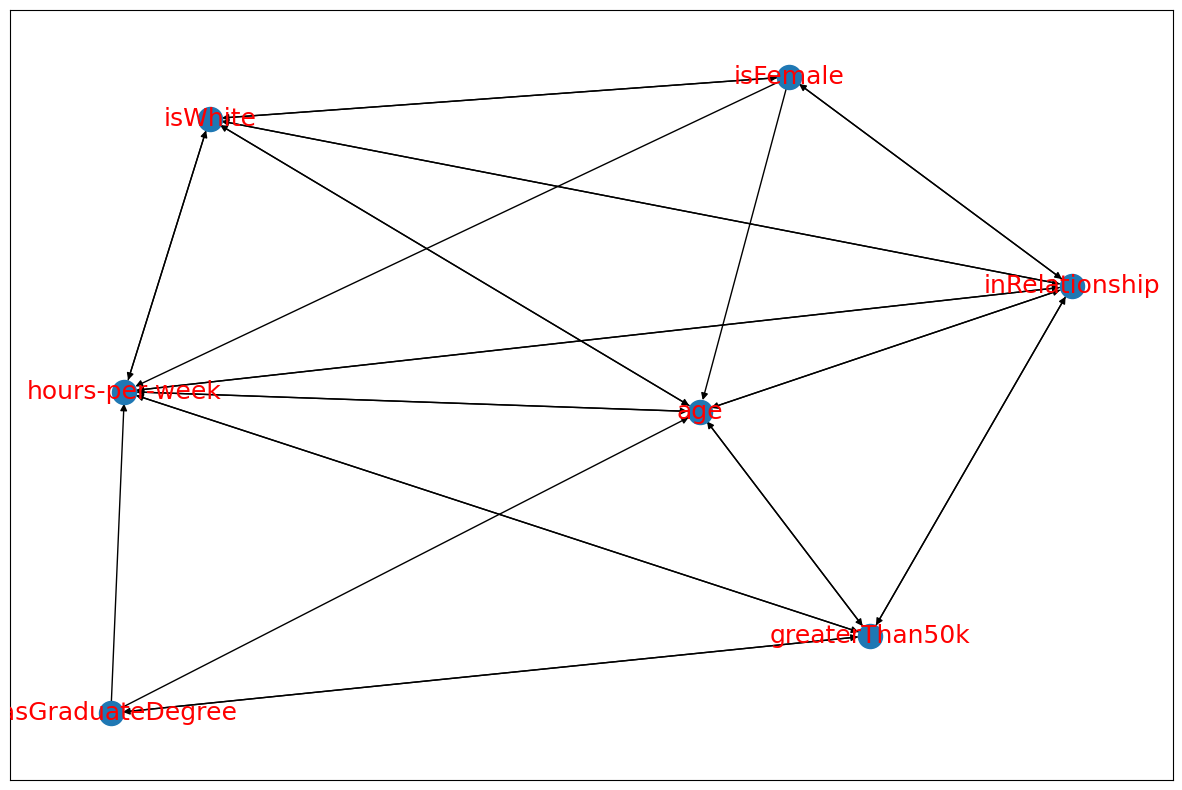

In [28]:
model_pc = PC()
# graph_pc = model_pc.predict(df)
graph_pc = model_pc.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

# get adjaceny matrix of PC graph
A_pc = nx.adjacency_matrix(graph_pc).todense()